Now that I've figured out how to deal with the issue of precincts with zero votes in a given election, I'll give it another try.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\Will\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#Read in election percentage data
#Use only statewide elections, i.e. those where all precincts voted
#However, require only 500 non-null values (out of 560ish) to account for situations where small precincts have zero votes

ElectionPct = pd.read_csv("elections_2014_2016.csv", index_col=0, header=[0, 1, 2]).dropna(axis=1, thresh=500)
ElectionPct.head()

Race                   Ballot Measure 2 - 13PSUM            \
Statistic                                     NO       YES   
Party                                         NP        NP   
Precinct                                                     
01-446 Aurora                           0.452193  0.547807   
01-455 Fairbanks No. 1                  0.380208  0.619792   
01-465 Fairbanks No. 2                  0.339683  0.660317   
01-470 Fairbanks No. 3                  0.424547  0.575453   
01-475 Fairbanks No. 4                  0.387097  0.612903   

Race                   Ballot Measure 3 - 13MINW            \
Statistic                                     NO       YES   
Party                                         NP        NP   
Precinct                                                     
01-446 Aurora                           0.274860  0.725140   
01-455 Fairbanks No. 1                  0.276923  0.723077   
01-465 Fairbanks No. 2                  0.223270  0.776730   
01-470 Fairbanks No. 3                  0.262327  0.737673   
01-475 Fairbanks No. 4                  0.264286  0.735714   

Race                   Ballot Measure 4 - 12BBAY            \
Statistic                                     NO       YES   
Party                                         NP        NP   
Precinct                                                     
01-446 Aurora                           0.350230  0.649770   
01-455 Fairbanks No. 1                  0.352332  0.647668   
01-465 Fairbanks No. 2                  0.291139  0.708861   
01-470 Fairbanks No. 3                  0.414000  0.586000   
01-475 Fairbanks No. 4                  0.383212  0.616788   

Race                   GOVERNOR/LT GOVERNOR                                \
Statistic                         Clift/Lee Myers/Rensel Parnell/Sullivan   
Party                                   LIB          CON              REP   
Precinct                                                                    
01-446 Aurora                      0.034831     0.014607         0.433708   
01-455 Fairbanks No. 1             0.025641     0.020513         0.384615   
01-465 Fairbanks No. 2             0.056075     0.034268         0.442368   
01-470 Fairbanks No. 3             0.023669     0.013807         0.386588   
01-475 Fairbanks No. 4             0.039007     0.028369         0.400709   

Race                                          ...           \
Statistic              Walker/Mallott         ...            
Party                              NA         ...            
Precinct                                      ...            
01-446 Aurora                0.514607         ...            
01-455 Fairbanks No. 1       0.564103         ...            
01-465 Fairbanks No. 2       0.461059         ...            
01-470 Fairbanks No. 3       0.575937         ...            
01-475 Fairbanks No. 4       0.531915         ...            

Race                   US REPRESENTATIVE (R)_2016             \
Statistic                      Wright, Stephen T. Young, Don   
Party                                         REP        REP   
Precinct                                                       
01-446 Aurora                            0.252874   0.678161   
01-455 Fairbanks No. 1                   0.208333   0.791667   
01-465 Fairbanks No. 2                   0.261905   0.690476   
01-470 Fairbanks No. 3                   0.161290   0.752688   
01-475 Fairbanks No. 4                   0.187500   0.718750   

Race                    US SENATOR (ADL)                              \
Statistic              Blatchford, Edgar Metcalfe, Ray Stevens, Cean   
Party                                DEM           DEM           LIB   
Precinct                                                               
01-446 Aurora                   0.438596      0.438596      0.122807   
01-455 Fairbanks No. 1          0.347826      0.304348      0.347826   
01-465 Fairbanks No. 2          0.477273      0.340909      0

In [3]:
#Check shape
ElectionPct.shape

(561, 103)

The last 120 precincts in the list are aggregated totals of early, absentee or questioned votes by district. (3 types of votes x 40 districts). For example:

In [4]:
ElectionPct.tail(10)

Race                      Ballot Measure 2 - 13PSUM            \
Statistic                                        NO       YES   
Party                                            NP        NP   
Precinct                                                        
District 6 - Question                      0.355140  0.644860   
District 7 - Absentee                      0.533502  0.466498   
District 7 - Early Voting                  0.573218  0.426782   
District 7 - Question                      0.407332  0.592668   
District 8 - Absentee                      0.536649  0.463351   
District 8 - Early Voting                  0.531544  0.468456   
District 8 - Question                      0.319672  0.680328   
District 9 - Absentee                      0.486188  0.513812   
District 9 - Early Voting                  0.561111  0.438889   
District 9 - Question                      0.375367  0.624633   

Race                      Ballot Measure 3 - 13MINW            \
Statistic                                        NO       YES   
Party                                            NP        NP   
Precinct                                                        
District 6 - Question                      0.280757  0.719243   
District 7 - Absentee                      0.384131  0.615869   
District 7 - Early Voting                  0.392050  0.607950   
District 7 - Question                      0.344969  0.655031   
District 8 - Absentee                      0.402344  0.597656   
District 8 - Early Voting                  0.446072  0.553928   
District 8 - Question                      0.322314  0.677686   
District 9 - Absentee                      0.403978  0.596022   
District 9 - Early Voting                  0.463687  0.536313   
District 9 - Question                      0.294985  0.705015   

Race                      Ballot Measure 4 - 12BBAY            \
Statistic                                        NO       YES   
Party                                            NP        NP   
Precinct                                                        
District 6 - Question                      0.378289  0.621711   
District 7 - Absentee                      0.392438  0.607562   
District 7 - Early Voting                  0.348136  0.651864   
District 7 - Question                      0.311159  0.688841   
District 8 - Absentee                      0.424403  0.575597   
District 8 - Early Voting                  0.420839  0.579161   
District 8 - Question                      0.350575  0.649425   
District 9 - Absentee                      0.396613  0.603387   
District 9 - Early Voting                  0.418539  0.581461   
District 9 - Question                      0.381098  0.618902   

Race                      GOVERNOR/LT GOVERNOR                                \
Statistic                            Clift/Lee Myers/Rensel Parnell/Sullivan   
Party                                      LIB          CON              REP   
Precinct                                                                       
District 6 - Question                 0.043750     0.046875         0.465625   
District 7 - Absentee                 0.042660     0.006274         0.559598   
District 7 - Early Voting             0.023975     0.013148         0.543697   
District 7 - Question                 0.060543     0.033403         0.490605   
District 8 - Absentee                 0.022078     0.015584         0.610390   
District 8 - Early Voting             0.019841     0.010582         0.570106   
District 8 - Question                 0.051724     0.048851         0.511494   
District 9 - Absentee                 0.026860     0.030992         0.472452   
District 9 - Early Voting             0.008357     0.019499         0.537604   
District 9 - Question                 0.032544     0.050296         0.396450   

Race                                             ...           \
Statistic                 Walker/Mallott         ...            
Party           

This is a problem because turnout numbers are not meaningful for these "precincts". The turnout number represents the number who cast absentee/early/questioned (AEQ) ballots over the total number in the district, so it will be way lower than the election day turnout for a given precinct. We will run two versions of the analysis. The first will use turnout as a factor in fitting precincts to clusters but will eliminate the absentee/early/questioned "precincts". The second will do the opposite: keep the AEQ votes but not use turnout as a metric.

In [5]:
#remove all precincts whose name starts with "District" - this will get the absentee/questioned/early votes
NoAEQ = ElectionPct[ElectionPct.index.str.startswith("District") == False]
NoAEQ.tail(10)

Race              Ballot Measure 2 - 13PSUM            \
Statistic                                NO       YES   
Party                                    NP        NP   
Precinct                                                
40-028 Noorvik                     0.449664  0.550336   
40-030 Nuiqsut                     0.209677  0.790323   
40-032 Point Hope                  0.239362  0.760638   
40-034 Point Lay                   0.157895  0.842105   
40-036 Selawik                     0.268116  0.731884   
40-038 Shungnak                    0.253165  0.746835   
40-040 Wainwright                  0.251613  0.748387   
40-326 Allakaket                   0.356322  0.643678   
40-328 Bettles                     0.312500  0.687500   
40-330 Hughes                      0.340000  0.660000   

Race              Ballot Measure 3 - 13MINW            \
Statistic                                NO       YES   
Party                                    NP        NP   
Precinct                                                
40-028 Noorvik                     0.222930  0.777070   
40-030 Nuiqsut                     0.120000  0.880000   
40-032 Point Hope                  0.109375  0.890625   
40-034 Point Lay                   0.084746  0.915254   
40-036 Selawik                     0.143885  0.856115   
40-038 Shungnak                    0.173333  0.826667   
40-040 Wainwright                  0.133758  0.866242   
40-326 Allakaket                   0.133333  0.866667   
40-328 Bettles                     0.375000  0.625000   
40-330 Hughes                      0.020000  0.980000   

Race              Ballot Measure 4 - 12BBAY           GOVERNOR/LT GOVERNOR  \
Statistic                                NO       YES            Clift/Lee   
Party                                    NP        NP                  LIB   
Precinct                                                                     
40-028 Noorvik                     0.578616  0.421384             0.037500   
40-030 Nuiqsut                     0.435484  0.564516             0.057851   
40-032 Point Hope                  0.340426  0.659574             0.021277   
40-034 Point Lay                   0.338983  0.661017             0.140351   
40-036 Selawik                     0.555556  0.444444             0.069444   
40-038 Shungnak                    0.544304  0.455696             0.024691   
40-040 Wainwright                  0.331210  0.668790             0.031847   
40-326 Allakaket                   0.344086  0.655914             0.021277   
40-328 Bettles                     0.266667  0.733333             0.000000   
40-330 Hughes                      0.240000  0.760000             0.019608   

Race                                                            \
Statistic         Myers/Rensel Parnell/Sullivan Walker/Mallott   
Party                      CON              REP             NA   
Precinct                                                         
40-028 Noorvik        0.112500         0.387500       0.450000   
40-030 Nuiqsut        0.115702         0.396694       0.429752   
40-032 Point Hope     0.079787         0.436170       0.462766   
40-034 Point Lay      0.070175         0.403509       0.385965   
40-036 Selawik        0.069444         0.465278       0.395833   
40-038 Shungnak       0.049383         0.432099       0.493827   
40-040 Wainwright     0.095541         0.490446       0.375796   
40-326 Allakaket      0.021277         0.074468       0.882979   
40-328 Bettles        0.000000         0.500000       0.500000   
40-330 Hughes         0.078431         0.098039       0.803922   

Race                      ...          US REPRESENTATIVE (R)_2016             \
Statistic                 ...                  Wright, Stephen T. Young, Don   
Party                     ...                                 REP        REP   
Precinct                  ...                                                  
40-028 Noorvik            ...                            0.00000

In [6]:
NoAEQ.shape

(441, 103)

We will now start employing a couple of different clustering algorithms. Since I don't know how many clusters the data naturally split into, first I will try using k-means clustering with k between 2 and 10, then create an "elbow plot" of sum-of-squares scores to try to determine whether there is a clear best value of k.

In [7]:
from sklearn import cluster

In [8]:
#set up score dataframe, which we will plot later
SS_scores = pd.DataFrame(columns = ['K', 'score'])
SS_scores.K = range(2, 11)
SS_scores

,K,score
0,2,NaN
1,3,NaN
2,4,NaN
3,5,NaN
4,6,NaN
5,7,NaN
6,8,NaN
7,9,NaN
8,10,NaN


In [10]:
import sklearn

In [11]:
#Run K-means clustering with K from 2 to 10
for K in range(2, 11):
    cluster = sklearn.cluster.KMeans(n_clusters = K)
    cluster.fit(NoAEQ)
    SS_scores['score'][SS_scores.K == K] = cluster.inertia_
SS_scores

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Interesting. Since this time I left in a few small precincts with zero votes for some elections, the clustering algorithm threw an error. I will have to replace NaN by some value - probably 0. This is not ideal, as it might cause those precincts to cluster in unpredictable ways (e.g. thinking they're highly Democratic or highly Republican), but I'll try it for now. Later I can check against a version with those precincts removed to see if it makes a significant difference.

In [12]:
NoAEQ_NN = NoAEQ.replace(np.nan, 0)

In [24]:
#Run K-means clustering with K from 2 to 10
kmeans = {}
results = {}
for k in range(2, 11):
    kmeans[k] = sklearn.cluster.KMeans(n_clusters = k)
    kmeans[k].fit(NoAEQ_NN) #NN stands for no nulls
    results[k] = kmeans[k].labels_
    print k, kmeans[k].inertia_
    SS_scores['score'][SS_scores.K == k] = kmeans[k].inertia_
SS_scores

2 368.308859496
3 302.225332955
4 281.038221181
5 269.139827793
6 260.351983438
7 250.259819268
8 245.119019474
9 239.959580615
10 232.121885442


C:\Users\Will\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,K,score
0,2,368.309
1,3,302.225
2,4,281.038
3,5,269.14
4,6,260.352
5,7,250.26
6,8,245.119
7,9,239.96
8,10,232.122


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

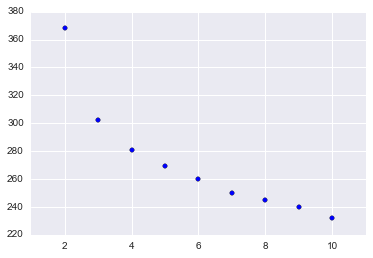

In [25]:
plt.scatter(data=SS_scores, x='K', y='score')

It looks to me as if K=3 is the elbow point, or possibly K=4. We will investigate those two cases further.

First, let's use 2-dimensional PCA to visualize the breakdown of precincts into 3 and 4 clusters.

In [26]:
PCA2 = sklearn.decomposition.PCA(n_components=2)
PCA2.fit(NoAEQ_NN)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
#Data frame of PCA components plus K-means clustering labels
Results_NoAEQ_NN = pd.DataFrame(PCA2.transform(NoAEQ_NN)).join(pd.DataFrame(results))
Results_NoAEQ_NN.index = NoAEQ_NN.index
#Create column names so sns.lmplot will work
Results_NoAEQ_NN.rename(columns = lambda n: 'x'+str(n) if n < 2 else 'k'+str(n), inplace=True)
#Create extra levels so merge will work
Results_NoAEQ_NN.columns = pd.MultiIndex.from_product([Results_NoAEQ_NN.columns, [''], ['']])
#Test
Results_NoAEQ_NN.head()

,x0,x1,k2,k3,k4,k5,k6,k7,k8,k9,k10
,,,,,,,,,,,
,,,,,,,,,,,
Precinct,,,,,,,,,,,
01-446 Aurora,-0.096131,0.284376,1,1,2,1,5,4,6,4,6
01-455 Fairbanks No. 1,-0.063650,-0.047960,1,1,2,1,5,4,6,4,2
01-465 Fairbanks No. 2,-0.057626,0.060820,1,1,2,1,5,4,6,4,6
01-470 Fairbanks No. 3,0.122108,0.232624,0,1,2,1,5,4,6,4,6
01-475 Fairbanks No. 4,-0.081635,0.226050,1,1,2,1,5,4,6,4,6


In [37]:
import seaborn as sns

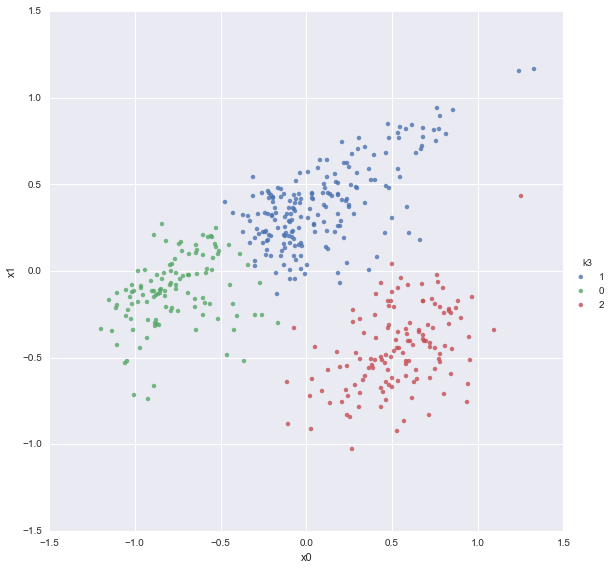

In [40]:
#Scatter plot with cluster labels for K=3
sns.lmplot(data=Results_NoAEQ_NN, x='x0', y='x1', hue='k3', size=8, fit_reg=False)

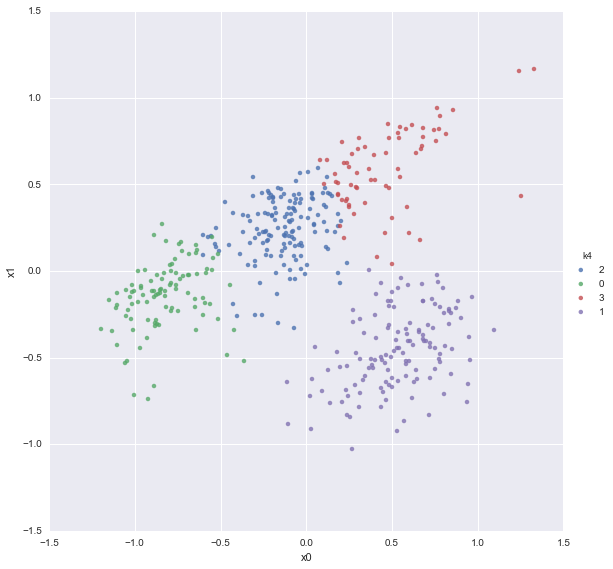

In [41]:
#Scatter plot with cluster labels for K=4
sns.lmplot(data=Results_NoAEQ_NN, x='x0', y='x1', hue='k4', size=8, fit_reg=False)

I'm curious about the few outlier precincts on the right of the graph. Which ones are they?

In [44]:
Results_NoAEQ_NN[Results_NoAEQ_NN['x0'] > 1]

,x0,x1,k2,k3,k4,k5,k6,k7,k8,k9,k10
,,,,,,,,,,,
,,,,,,,,,,,
Precinct,,,,,,,,,,,
06-007 Arctic Village,1.251480,0.429115,0,2,3,4,2,6,4,0,7
06-026 Denali Park,1.326406,1.164519,0,1,3,4,2,5,1,0,4
33-515 Juneau No. 2,1.241194,1.151800,0,1,3,4,2,5,1,0,4
40-326 Allakaket,1.097004,-0.342382,0,2,1,0,3,1,7,3,8


Denali Park and Juneau No. 2 are both very liberal precincts - maybe the two most liberal in the state. They're near each other on the PCA graph. Arctic Village and Allakaket are both rural Interior villages, but they're in different clusters. We'll learn more once we learn what the PCA dimensions represent.

The K=4 clusters look reasonable to me, but to tell a coherent story, we must figure out how the actual variables correspond to the clusters. To get an idea, let's first look at the PCA dimensions. For each of the two PCA dimensions, I'll run a scatterplot against several election variables. My hypothesis is that the horizontal dimension represents basic partisanship, while the vertical dimension is some kind of urban-rural divide and/or voter turnout.

In [45]:
#Merge results data frame onto original
NoAEQ_NN_clusters = NoAEQ_NN.merge(Results_NoAEQ_NN, left_index=True, right_index=True, how='left')
NoAEQ_NN_clusters.head()

Race                   Ballot Measure 2 - 13PSUM            \
Statistic                                     NO       YES   
Party                                         NP        NP   
Precinct                                                     
01-446 Aurora                           0.452193  0.547807   
01-455 Fairbanks No. 1                  0.380208  0.619792   
01-465 Fairbanks No. 2                  0.339683  0.660317   
01-470 Fairbanks No. 3                  0.424547  0.575453   
01-475 Fairbanks No. 4                  0.387097  0.612903   

Race                   Ballot Measure 3 - 13MINW            \
Statistic                                     NO       YES   
Party                                         NP        NP   
Precinct                                                     
01-446 Aurora                           0.274860  0.725140   
01-455 Fairbanks No. 1                  0.276923  0.723077   
01-465 Fairbanks No. 2                  0.223270  0.776730   
01-470 Fairbanks No. 3                  0.262327  0.737673   
01-475 Fairbanks No. 4                  0.264286  0.735714   

Race                   Ballot Measure 4 - 12BBAY            \
Statistic                                     NO       YES   
Party                                         NP        NP   
Precinct                                                     
01-446 Aurora                           0.350230  0.649770   
01-455 Fairbanks No. 1                  0.352332  0.647668   
01-465 Fairbanks No. 2                  0.291139  0.708861   
01-470 Fairbanks No. 3                  0.414000  0.586000   
01-475 Fairbanks No. 4                  0.383212  0.616788   

Race                   GOVERNOR/LT GOVERNOR                                \
Statistic                         Clift/Lee Myers/Rensel Parnell/Sullivan   
Party                                   LIB          CON              REP   
Precinct                                                                    
01-446 Aurora                      0.034831     0.014607         0.433708   
01-455 Fairbanks No. 1             0.025641     0.020513         0.384615   
01-465 Fairbanks No. 2             0.056075     0.034268         0.442368   
01-470 Fairbanks No. 3             0.023669     0.013807         0.386588   
01-475 Fairbanks No. 4             0.039007     0.028369         0.400709   

Race                                  ...        x1 k2 k3 k4 k5 k6 k7 k8 k9  \
Statistic              Walker/Mallott ...                                     
Party                              NA ...                                     
Precinct                              ...                                     
01-446 Aurora                0.514607 ...  0.284376  1  1  2  1  5  4  6  4   
01-455 Fairbanks No. 1       0.564103 ... -0.047960  1  1  2  1  5  4  6  4   
01-465 Fairbanks No. 2       0.461059 ...  0.060820  1  1  2  1  5  4  6  4   
01-470 Fairbanks No. 3       0.575937 ...  0.232624  0  1  2  1  5  4  6  4   
01-475 Fairbanks No. 4       0.531915 ...  0.226050  1  1  2  1  5  4  6  4   

Race                   k10  
Statistic                   
Party                       
Precinct                    
01-446 Aurora            6  
01-455 Fairbanks No. 1   2  
01-465 Fairbanks No. 2   6  
01-470 Fairbanks No. 3   6  
01-475 Fairbanks No. 4   6  

[5 rows x 114 columns]

Let's start with the most fun variable: pot legalization! This is Ballot Measure 2 - 13PSUM.

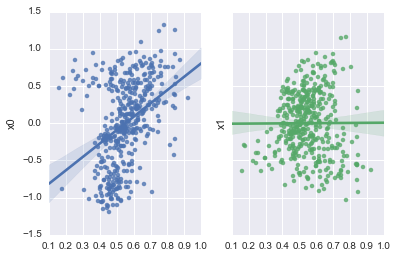

In [57]:
#Plot support for pot legalization against x0 and x1
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x = NoAEQ_NN_clusters['Ballot Measure 2 - 13PSUM']['YES'], y = NoAEQ_NN_clusters['x0'], ax=ax1)
sns.regplot(x = NoAEQ_NN_clusters['Ballot Measure 2 - 13PSUM']['YES'], y = NoAEQ_NN_clusters['x1'], ax=ax2)

Pot legalization is correlated with x0, not with x1. Next: governor's race in 2014 (Walker share).

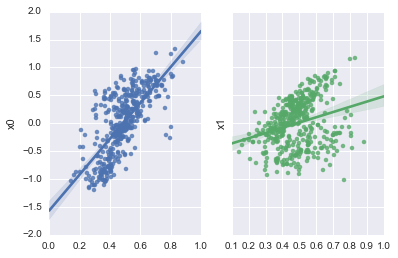

In [58]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x = NoAEQ_NN_clusters['GOVERNOR/LT GOVERNOR']['Walker/Mallott'], y = NoAEQ_NN_clusters['x0'], ax=ax1)
sns.regplot(x = NoAEQ_NN_clusters['GOVERNOR/LT GOVERNOR']['Walker/Mallott'], y = NoAEQ_NN_clusters['x1'], ax=ax2)

Very strong correlation with x0, suggesting this is indeed about partisanship. Modest correlation with x1.
Next: presidential race in 2016, Trump share.

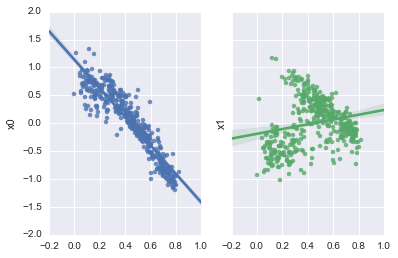

In [59]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x = NoAEQ_NN_clusters['US PRESIDENT']['Trump, Donald J.'], y = NoAEQ_NN_clusters['x0'], ax=ax1)
sns.regplot(x = NoAEQ_NN_clusters['US PRESIDENT']['Trump, Donald J.'], y = NoAEQ_NN_clusters['x1'], ax=ax2)

Clearest evidence yet that x0 is about partisanship. Interesting that x1 is correlated with Walker in the same direction as Trump, although the x0 correlation is strongly opposite.
Now let's consider turnout in general elections.

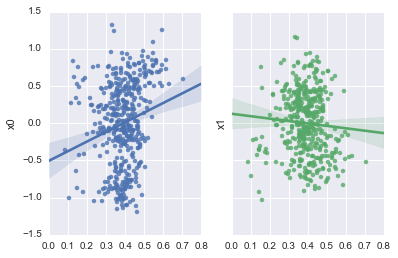

In [69]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x = NoAEQ_NN_clusters['Turnout_G_2016'], y = NoAEQ_NN_clusters['x0'], ax=ax1)
sns.regplot(x = NoAEQ_NN_clusters['Turnout_G_2016'], y = NoAEQ_NN_clusters['x1'], ax=ax2)


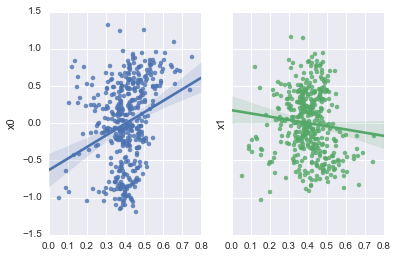

In [71]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x = NoAEQ_NN_clusters['Turnout_G_2014'], y = NoAEQ_NN_clusters['x0'], ax=ax1)
sns.regplot(x = NoAEQ_NN_clusters['Turnout_G_2014'], y = NoAEQ_NN_clusters['x1'], ax=ax2)

Contrary to what I thought, turnout is also more associated with x0 than x1 (and liberal precincts appear to turn out at higher rates than conservative ones, on average).

Let's look at congressional races. First, the 2016 US House of Representatives race (Don Young share).

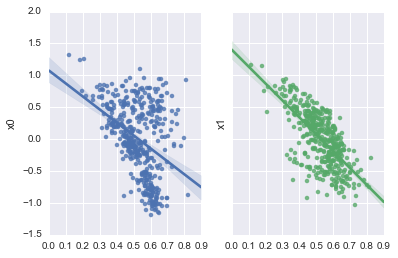

In [72]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x = NoAEQ_NN_clusters['US REPRESENTATIVE_2016']['Young, Don'], y = NoAEQ_NN_clusters['x0'], ax=ax1)
sns.regplot(x = NoAEQ_NN_clusters['US REPRESENTATIVE_2016']['Young, Don'], y = NoAEQ_NN_clusters['x1'], ax=ax2)

And the 2014 race:

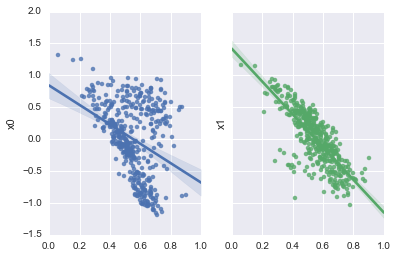

In [73]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x = NoAEQ_NN_clusters['US REPRESENTATIVE_2014']['Young, Don'], y = NoAEQ_NN_clusters['x0'], ax=ax1)
sns.regplot(x = NoAEQ_NN_clusters['US REPRESENTATIVE_2014']['Young, Don'], y = NoAEQ_NN_clusters['x1'], ax=ax2)

Here is where we see a tight correlation with x1 show up. This is picking up the fact that many rural, heavily Alaska Native precincts vote for Don Young (a longtime incumbent) even though they vote for Democrats in other races.

Now let's look at Lisa Murkowski's 2016 Senate race:

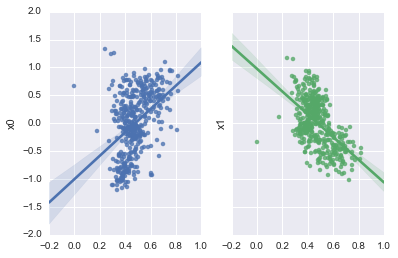

In [74]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x = NoAEQ_NN_clusters['US SENATOR']['Murkowski, Lisa'], y = NoAEQ_NN_clusters['x0'], ax=ax1)
sns.regplot(x = NoAEQ_NN_clusters['US SENATOR']['Murkowski, Lisa'], y = NoAEQ_NN_clusters['x1'], ax=ax2)

The correlations are not as tight, but definitely present. More liberal areas supported Murkowski more on average (while conservative areas supported her right-wing opponent Joe Miller). Rural areas that voted for Don Young also backed Murkowski.

Let's consider the 2014 ballot measure to overturn the oil tax bill SB 21.

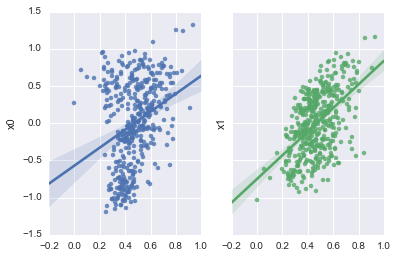

In [75]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x = NoAEQ_NN_clusters['MEASURE NO. 1 - 13SB21']['YES'], y = NoAEQ_NN_clusters['x0'], ax=ax1)
sns.regplot(x = NoAEQ_NN_clusters['MEASURE NO. 1 - 13SB21']['YES'], y = NoAEQ_NN_clusters['x1'], ax=ax2)

Not surprisingly, there is a correlation with x0, although not nearly as tight as the partisan correlation. More liberal areas tended to support overturning the oil tax bill (which was viewed as friendly to oil companies). The correlation with x1 actually appears tighter: it appears the rural, Young/Murkowski-supporting areas didn't like SB 21.

Finally let's consider a primary race: the 2014 Republican primary for US Senate. Look at the vote share for Dan Sullivan, the winner.

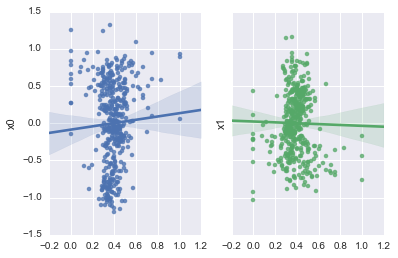

In [78]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x = NoAEQ_NN_clusters['US SENATOR (R)']['Sullivan, Dan'], y = NoAEQ_NN_clusters['x0'], ax=ax1)
sns.regplot(x = NoAEQ_NN_clusters['US SENATOR (R)']['Sullivan, Dan'], y = NoAEQ_NN_clusters['x1'], ax=ax2)

There is not much correlation, mainly because Sullivan's performance didn't vary much between precincts.

Now that I've done all these regression plots, I remember I was going to do a heatmap for a much more concise representation of how the PCA components correspond to the real variables.

In [80]:
NoAEQ_NN_corr = NoAEQ_NN_clusters.corr()
NoAEQ_NN_corr

Race                                                                    Ballot Measure 2 - 13PSUM  \
Statistic                                                                                      NO   
Party                                                                                          NP   
Race                         Statistic             Party                                            
Ballot Measure 2 - 13PSUM    NO                    NP                                    1.000000   
                             YES                   NP                                   -1.000000   
Ballot Measure 3 - 13MINW    NO                    NP                                    0.478205   
                             YES                   NP                                   -0.478205   
Ballot Measure 4 - 12BBAY    NO                    NP                                    0.298960   
                             YES                   NP                                   -0.298960   
GOVERNOR/LT GOVERNOR         Clift/Lee             LIB                                  -0.297421   
                             Myers/Rensel          CON                                  -0.181125   
                             Parnell/Sullivan      REP                                   0.410794   
                             Walker/Mallott        NA                                   -0.297580   
                             Write-in              NP                                   -0.083985   
Supreme Crt-Justice Stowers  NO                    NP                                    0.099365   
                             YES                   NP                                   -0.099365   
UNITED STATES SENATOR        Begich, Mark          DEM                                  -0.268490   
                             Fish, Mark S.         LIB                                  -0.247014   
                             Gianoutsos, Ted       NA                                   -0.237348   
                             Sullivan, Dan         REP                                   0.335085   
                             Write-in 70           NP                                   -0.156640   
US REPRESENTATIVE_2014       Dunbar, Forrest       DEM                                  -0.160002   
                             McDermott, Jim C.     LIB                                  -0.024199   
                             Write-in 50           NP                                   -0.038048   
                             Young, Don            REP                                   0.173032   
Turnout_G_2014               Unnamed: 204_level_1  Unnamed: 204_level_2                  0.102644   
GOVERNOR (ADL)               Clift, Carolyn F. \C" LIB                                   0.032593   
                             Mallott, Byron I.     DEM                                  -0.056924   
                             Stoddard, Phil G.     DEM                                   0.103515   
GOVERNOR (REP)               Heikes, Gerald L. \T" REP                                  -0.165438   
                             Millette, Russ        REP                                   0.072153   
                             Parnell, Sean R.      REP                                   0.254191   
                             Snowden, Brad         REP                                  -0.156037   
...                                                                                           ...   
US SENATOR                   Write-in 70           NP                                    0.057389   
Turnout_G_2016               Unnamed: 577_level_1  Unnamed: 577_level_2                  0.127004   
US REPRESENTATIVE (ADL)_2016 Hibler, William D.    DEM                                  -0.209129   
                             Hinz, Lynette         DEM                                  -0.085702   
                             Lindbeck, Steve       DEM       

In [81]:
#Correlation heat map of selected election variables with x0 and x1
heatcorr = NoAEQ_NN_corr.loc[[['US PRESIDENT']['Trump, Donald J.'],
                                  ['GOVERNOR/LT GOVERNOR']['Walker/Mallott'],
                                  ['Ballot Measure 2 - 13PSUM']['YES'],
                                  ['MEASURE NO. 1 - 13SB21']['YES'],
                                  ['US SENATOR']['Murkowski, Lisa'],
                                  ['US REPRESENTATIVE_2016']['Young, Don'],
                                  'Turnout_G_2016',
                                  ['US SENATOR (R)']['Sullivan, Dan']],
                                 ['x0', 'x1']]

TypeError: list indices must be integers, not str

Let's reproduce the K=4 graph just for clarity:

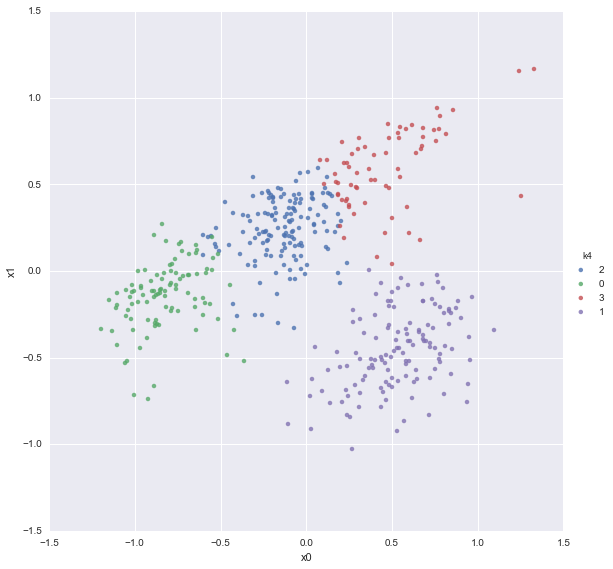

In [76]:
sns.lmplot(data=Results_NoAEQ_NN, x='x0', y='x1', hue='k4', size=8, fit_reg=False)

We have a pretty clear story here: the four clusters are:
* Conservative (green/middle left)
* Moderate (blue, middle)
* Liberal (red, upper right)
* Esoteric/rural (purple, lower right)

To verify this story, let's look at graphs by cluster for each of the variables we looked at above.

In [89]:
#Save variables for later
globals().keys()

['__',
 'results',
 'sklearn',
 '_i38',
 '_61',
 '_64',
 '_68',
 '_69',
 '_i55',
 'NoAEQ_NN',
 'kmeans',
 '_88',
 '_55',
 '_i27',
 '_85',
 '_87',
 '_80',
 '_sh',
 '_8',
 '_6',
 '_5',
 '_4',
 '_3',
 '_2',
 '_i13',
 '_i12',
 '_i11',
 '_i10',
 '_13',
 '_i16',
 '_i15',
 '_i14',
 '_i19',
 '_i18',
 '_19',
 '_18',
 '_dh',
 '_17',
 '_iii',
 '_i39',
 '_i44',
 'exit',
 '_i28',
 '_i29',
 '_i26',
 '_i17',
 '_i24',
 '_i25',
 '_i22',
 '_i23',
 '_i20',
 '_i21',
 'plt',
 '_i48',
 '_i49',
 '__builtins__',
 '_i45',
 '_i46',
 '_i47',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_ih',
 '__name__',
 '___',
 '_',
 '_i89',
 'k',
 '_39',
 '_38',
 '_31',
 '_i30',
 '_33',
 '_32',
 '_35',
 '_i34',
 '_i37',
 '_36',
 '_59',
 '_58',
 '_i59',
 '_i58',
 '_i57',
 '_i56',
 '_51',
 '_i54',
 '_i53',
 '_i52',
 '__builtin__',
 '_i50',
 '_i81',
 'quit',
 '_i51',
 'SS_scores',
 '_i85',
 'pd',
 '_26',
 '_27',
 '_24',
 '_25',
 '_22',
 '__doc__',
 '_21',
 '_i68',
 '_i69',
 '_i',
 'NoAEQ_NN_clusters',
 '_40',
 '_i63',
 '_i60',
 '_i61',

In [90]:
NoAEQ_NN.to_csv('NoAEQ_NN.csv')

In [91]:
NoAEQ_NN_clusters.to_csv('NoAEQ_NN_clusters.csv')

In [92]:
Results_NoAEQ_NN.to_csv('Results_NoAEQ_NN.csv')

In [93]:
NoAEQ.to_csv('NoAEQ.csv')

In [94]:
ElectionPct.to_csv('ElectionPct.csv')

In [95]:
NoAEQ_NN_corr.to_csv('NoAEQ_NN_corr.csv')